In [3]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential

from sklearn.model_selection import train_test_split

In [5]:
data_1 = pd.read_csv('train.csv')

In [6]:
data_1.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [7]:
data_2 = pd.read_csv('test.csv')

In [8]:
data_2.head()

,image_names
0,5603.jpg
1,1286.jpg
2,9815.jpg
3,8865.jpg
4,9306.jpg


In [9]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [10]:
# distribution of classes in the dataset
data_1['class'].value_counts()

class
1    6174
0    6022
Name: count, dtype: int64

In [11]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data_1.image_names:
    # loading the image using its name
    img = plt.imread('images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data_1['class'].values
#y = data_1.class.values

In [12]:
X.shape

(12196, 224, 224, 3)

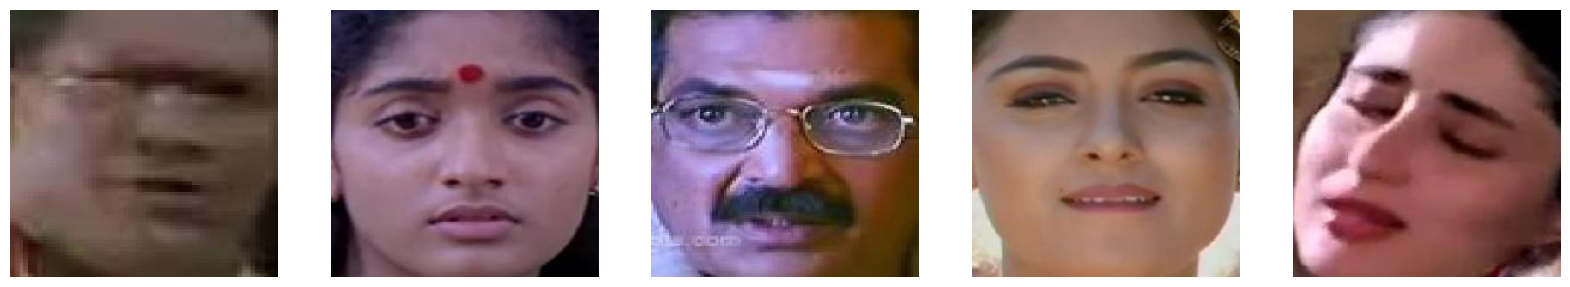

In [13]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

In [14]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(12196, 150528)

In [15]:
X.min(), X.max()

(0, 255)

normalized 

In [16]:
# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0, 255)

Creating training and testing model

In [17]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=seed)

# Displaying the shapes of the training and validation sets
print("Training set shapes:", X_train.shape, y_train.shape)
print("Validation set shapes:", X_valid.shape, y_valid.shape)

Training set shapes: (8537, 150528) (8537,)
Validation set shapes: (3659, 150528) (3659,)


Defining the model architecture

In [19]:
model = Sequential()
model.add(InputLayer(shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))


In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

Compiling the model

In [21]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [22]:
# training the model
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.5049 - loss: 0.7023 - val_accuracy: 0.5154 - val_loss: 0.6927
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.5000 - loss: 0.6940 - val_accuracy: 0.5154 - val_loss: 0.6928
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.4938 - loss: 0.6935 - val_accuracy: 0.4843 - val_loss: 0.6936
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.5001 - loss: 0.6934 - val_accuracy: 0.5154 - val_loss: 0.6928
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.4961 - loss: 0.6935 - val_accuracy: 0.5154 - val_loss: 0.6928
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.5011 - loss: 0.6936 - val_accuracy: 0.4843 - val_loss: 0.6934
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.4920 - loss: 0.6934 - val_accuracy: 0.4843 - val_loss: 0.6934
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.5014 - loss: 0.6932 - val_accuracy: 0.4843 - v

In [23]:
# Assuming model is your trained Keras Sequential model
# Assuming X_valid is your validation data

# Get the probabilities for each class
prediction_probabilities = model.predict(X_valid)

# Extract the class with the highest probability for each prediction
predictions = prediction_probabilities.argmax(axis=1)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [24]:
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, predictions), '%')

Accuracy on validation set: 0.4842853238589779 %


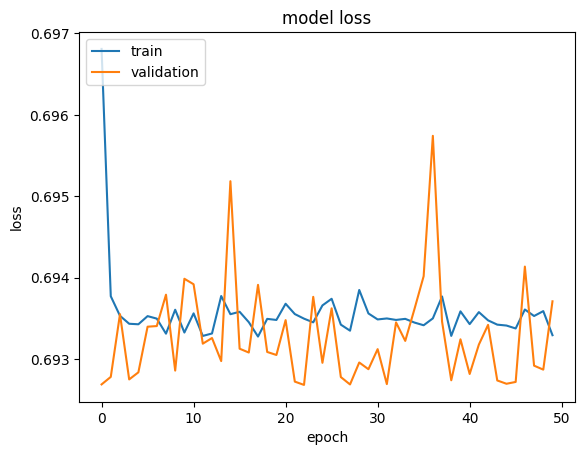

In [25]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

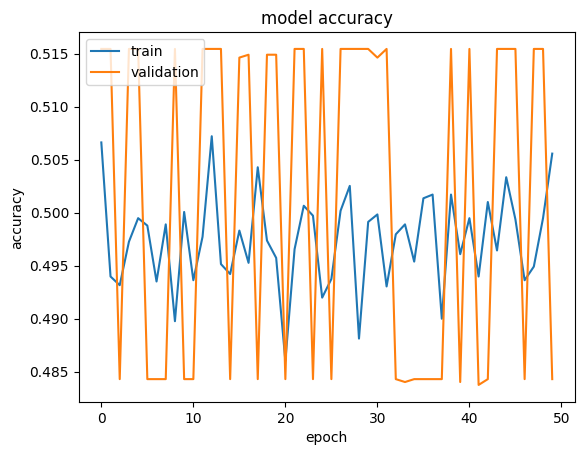

In [26]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Validating Gender

Model is [49] % sure that it is female
And actual class is  0


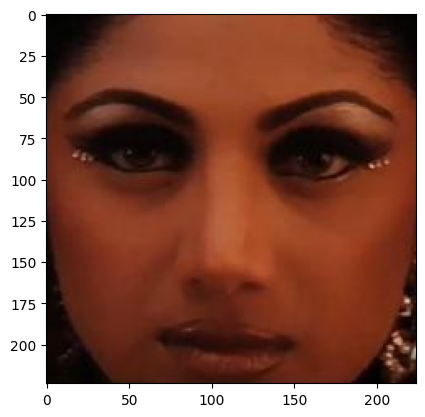

In [27]:
# pull out the original images from the data which correspond to the validation data
_, valid_Gender, _, valid_y = train_test_split(data_1.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_Gender)))

# get the corresponding image name and probability
img_name = valid_Gender[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# read the image
img = plt.imread('images/' + img_name)

# print probability and actual class
print('Model is', prob , '% sure that it is female')
print('And actual class is ', valid_y[index])

# plot image
plt.imshow(img)

In [29]:
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])


In [31]:
# summary of the model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# training the model for 50 epochs
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.4967 - loss: 78832.3984 - val_accuracy: 0.4843 - val_loss: 0.6932
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.5057 - loss: 0.6931 - val_accuracy: 0.4843 - val_loss: 0.6932
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.4903 - loss: 0.6932 - val_accuracy: 0.5157 - val_loss: 0.6931
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.4881 - loss: 0.6932 - val_accuracy: 0.5157 - val_loss: 0.6931
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.5044 - loss: 0.6932 - val_accuracy: 0.5157 - val_loss: 0.6931
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.4820 - loss: 0.6932 - val_accuracy: 0.5157 - val_loss: 0.6931
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - accuracy: 0.5096 - loss: 0.6931 - val_accuracy: 0.5157 - val_loss: 0.6931
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.5023 - loss: 0.6931 - val_accuracy: 

In [34]:
import numpy as np

# Assuming 'model' is your Sequential model
raw_predictions = model.predict(X_valid)
predicted_classes = np.argmax(raw_predictions, axis=1)

# Now you can calculate accuracy using the predicted classes
accuracy = accuracy_score(y_valid, predicted_classes)
print('Accuracy on validation set:', accuracy, '%')


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Accuracy on validation set: 0.4842853238589779 %


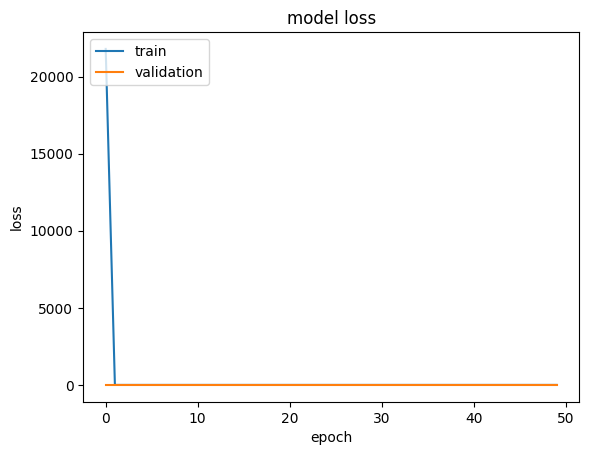

In [35]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Changing Number of Neurons in Hidden layers.

In [31]:
# increase hidden neurons
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [32]:
# model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1024)                │     154,141,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,142,721 (588.01 MB)

 Trainable params: 154,142,721 (588.01 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.5034 - loss: 0.7089 - val_accuracy: 0.5157 - val_loss: 0.7034
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.5054 - loss: 0.6975 - val_accuracy: 0.5154 - val_loss: 0.6916
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.5087 - loss: 0.6959 - val_accuracy: 0.5157 - val_loss: 0.7181
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.4973 - loss: 0.7041 - val_accuracy: 0.5163 - val_loss: 0.6930
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.5045 - loss: 0.6996 - val_accuracy: 0.5157 - val_loss: 0.7140
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 66s 989ms/step - accuracy: 0.5068 - loss: 0.7040 - val_accuracy: 0.5157 - val_loss: 0.7197
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.5041 - loss: 0.7020 - val_accuracy: 0.4873 - val_loss: 0.6937
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 66s 977ms/step - accuracy: 0.5001 - loss: 0.6990 - val_accuracy: 0.5157 - val

In [34]:
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming model is your Sequential model
y_pred_probabilities = model.predict(X_valid)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)
accuracy = accuracy_score(y_valid, y_pred_classes)
print('Accuracy on validation set:', accuracy , '%')

115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step
Accuracy on validation set: 0.4842853238589779 %


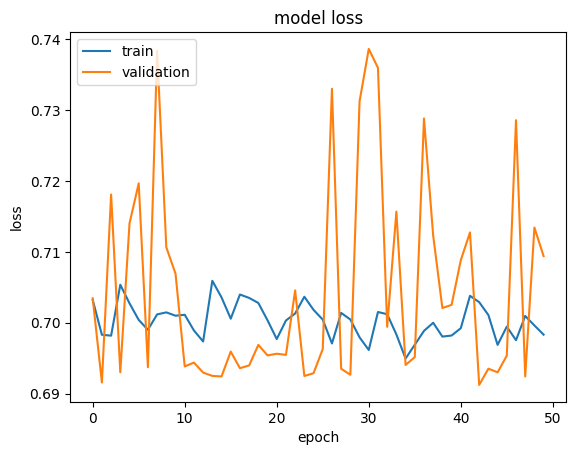

In [35]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [37]:
# increase hidden layers
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [38]:
# model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,063,101 (57.46 MB)

 Trainable params: 15,063,101 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.5090 - loss: 0.6974 - val_accuracy: 0.5157 - val_loss: 0.6924
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - accuracy: 0.5026 - loss: 0.6931 - val_accuracy: 0.5059 - val_loss: 0.6929
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.5109 - loss: 0.6927 - val_accuracy: 0.4846 - val_loss: 0.6938
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - accuracy: 0.5156 - loss: 0.6924 - val_accuracy: 0.5526 - val_loss: 0.6917
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.5380 - loss: 0.6921 - val_accuracy: 0.4974 - val_loss: 0.6924
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.5296 - loss: 0.6920 - val_accuracy: 0.5163 - val_loss: 0.6904
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - accuracy: 0.5234 - loss: 0.6908 - val_accuracy: 0.6228 - val_loss: 0.6905
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.5340 - loss: 0.6911 - val_accuracy: 0.

In [45]:
import numpy as np

# Assuming model.predict returns probabilities for each class
predicted_probs = model.predict(X_valid)
predicted_classes = np.argmax(predicted_probs, axis=1)

# Now you can calculate accuracy using predicted_classes
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, predicted_classes), '%')


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Accuracy on validation set: 0.4842853238589779 %


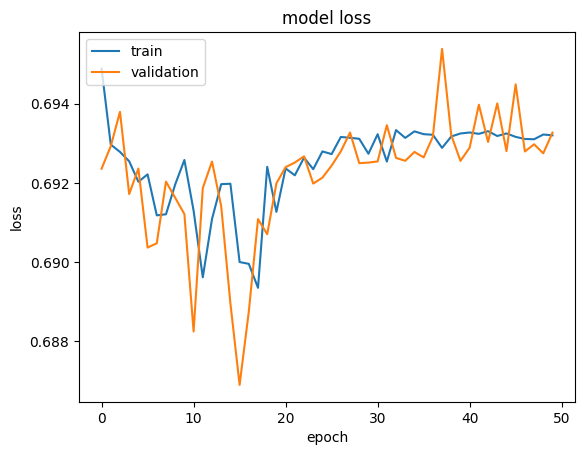

In [46]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [46]:
# increase number of epochs
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [47]:
# model summary
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.5033 - loss: 0.7321 - val_accuracy: 0.5157 - val_loss: 0.6928
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.4830 - loss: 0.6940 - val_accuracy: 0.5947 - val_loss: 0.6910
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.5074 - loss: 0.6935 - val_accuracy: 0.5157 - val_loss: 0.6927
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.4924 - loss: 0.6934 - val_accuracy: 0.5157 - val_loss: 0.6928
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.5083 - loss: 0.6930 - val_accuracy: 0.4846 - val_loss: 0.6951
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.5057 - loss: 0.6932 - val_accuracy: 0.5157 - val_loss: 0.6927
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.5075 - loss: 0.6932 - val_accuracy: 0.4846 - val_loss: 0.6945
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.4956 - loss: 0.6935 - val_accuracy: 0.

In [52]:
import numpy as np

# Assuming model is your Sequential model object
y_pred_prob = model.predict(X_valid)
y_pred_class = np.argmax(y_pred_prob, axis=1)

# Now you can calculate accuracy using y_valid and y_pred_class
accuracy = np.mean(y_valid == y_pred_class)
print('Accuracy on validation set:', accuracy, '%')


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Accuracy on validation set: 48.42853238589779 %


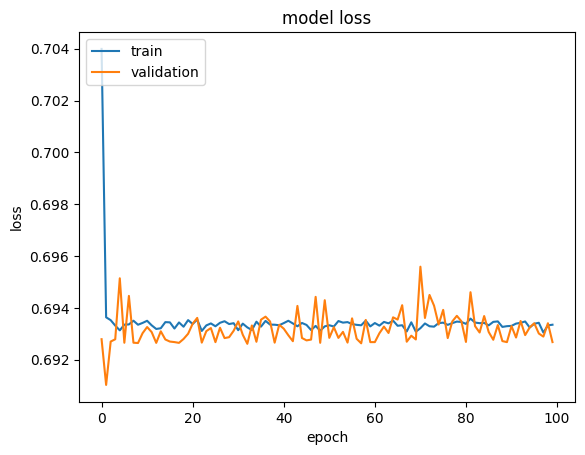

In [53]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [56]:
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

In [60]:
lr=1e-5
adam = Adam(lr)

#

In [61]:
# change optimizer
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [62]:
# model summary
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,063,101 (57.46 MB)

 Trainable params: 15,063,101 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - accuracy: 0.5155 - loss: 0.6994 - val_accuracy: 0.5171 - val_loss: 0.6927
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 175ms/step - accuracy: 0.5054 - loss: 0.6931 - val_accuracy: 0.5154 - val_loss: 0.6928
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 172ms/step - accuracy: 0.5076 - loss: 0.6930 - val_accuracy: 0.5154 - val_loss: 0.6929
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 172ms/step - accuracy: 0.5110 - loss: 0.6930 - val_accuracy: 0.5154 - val_loss: 0.6930
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 172ms/step - accuracy: 0.5044 - loss: 0.6931 - val_accuracy: 0.5154 - val_loss: 0.6931
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.5145 - loss: 0.6930 - val_accuracy: 0.5154 - val_loss: 0.6930
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 172ms/step - accuracy: 0.4943 - loss: 0.6932 - val_accuracy: 0.5154 - val_loss: 0.6931
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 173ms/step - accuracy: 0.5088 - loss: 0.6931 - 

In [70]:

# Assuming model.predict returns probabilities for each class
predicted_probabilities = model.predict(X_valid)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Now calculate accuracy
accuracy = accuracy_score(y_valid, predicted_classes)
print('Accuracy on validation set:', accuracy, '%')

115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Accuracy on validation set: 0.4842853238589779 %


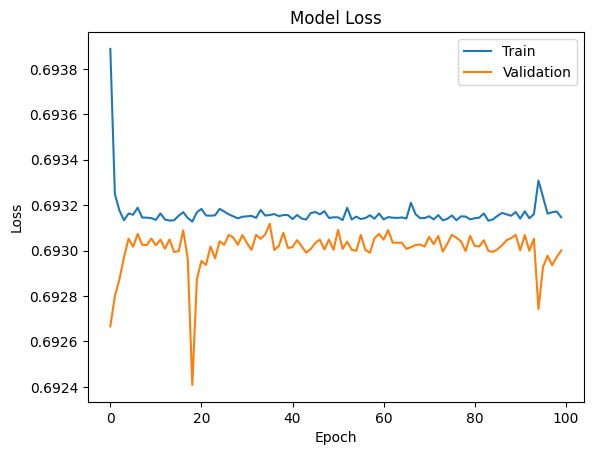

In [69]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

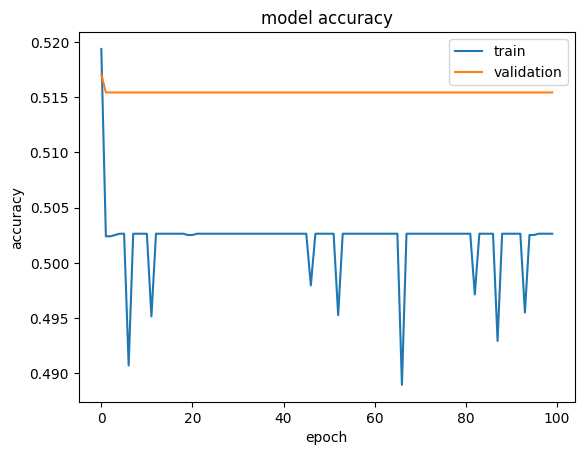

In [71]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()